# OMEGA-MAPPIN 

This notebook shows some of the analyses of the FOOF results from the MEG Data. 

The analyses code is all in a custom module (om). Here, is just a demonstration of some results. 

All data used here is at the source level. Each subject data was ultimately project to a template anatomy with 7500 vertices. 

In [1]:
# Import required libraries/functions
from __future__ import print_function, division
import sys

# Import custom code from module om, including general functions and OO code for handling data
from om.meg.single import MegSubj           # Import meg code for Single Subject
from om.meg.single import print_corrs_mat
from om.plts.meg import *                   # Import plots for meg
from om.core.db import OMDB
from om.core.osc import Osc

# Set plots to display inline
%matplotlib inline

In [2]:
# Set database object - a basic class that stores all paths for the project
db = OMDB()

In [3]:
# Check what data is available
dat_source = 'HCP'
sub_nums, source = db.check_dat_files('foof', dat_source)


Number of Subjects available: 78

Subject numbers with FOOF data available: 
[100307, 102816, 105923, 106521, 109123, 111514, 112920, 113922, 116524, 116726, 140117, 146129, 153732, 154532, 156334, 158136, 162026, 162935, 164636, 166438, 172029, 174841, 175237, 175540, 181232, 185442, 187547, 189349, 191033, 191437, 191841, 192641, 195041, 198653, 204521, 205119, 212318, 212823, 214524, 221319, 223929, 233326, 248339, 250427, 255639, 257845, 283543, 293748, 352132, 352738, 353740, 358144, 406836, 433839, 512835, 555348, 559053, 568963, 581450, 599671, 601127, 660951, 662551, 665254, 667056, 706040, 707749, 715950, 725751, 735148, 783462, 814649, 877168, 891667, 898176, 912447, 917255, 990366]



### Single Subject Analysis

Here, loads a single subject and analyses the data. 

In [4]:
# Check what saved pickle files are available
meg_files = db.check_res_files('meg')


Number of files available: 2

Files available: 
meg_Group_85_all_oscs_2016-12-01.p
meg_Group_85_vertex_osc_2016-12-01.p



In [5]:
## Import an individual subject of FOOF PSD results

# Set subject number to load
subj = sub_nums[0]

# Set up oscillation band definition
osc = Osc(default=True)

# Initialize data object and load data
meg_subj = MegSubj(db, dat_source, osc)
meg_subj.import_foof(subj, get_demo=True)

In [6]:
# Use oscillatory bands to find oscillations per band per vertex
meg_subj.osc_bands_vertex()

# This data can now be exported to matlab to be plotted on the cortex with Brainstorm
#meg_subj.set_foof_viz()

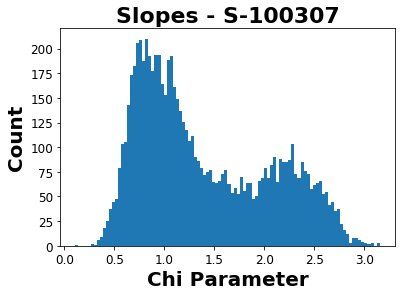

In [7]:
# Plot the distribution of slopes, as computed by FOOF
plot_slopes(meg_subj.slopes, meg_subj.comment, save_out=False)

In [8]:
# Convert format to vectors of all oscillations (regardless of anatomical location)
meg_subj.all_oscs()

Subj: 100307 Found 28  NaNs. Removing.


Number of oscillations: 22819


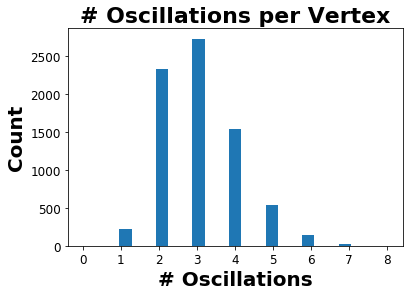

In [9]:
# Check how many oscillations were found total, and plot number of oscillations per vertex
print('Number of oscillations: ' + str(meg_subj.n_oscs))
plot_hist_count(meg_subj.osc_count)

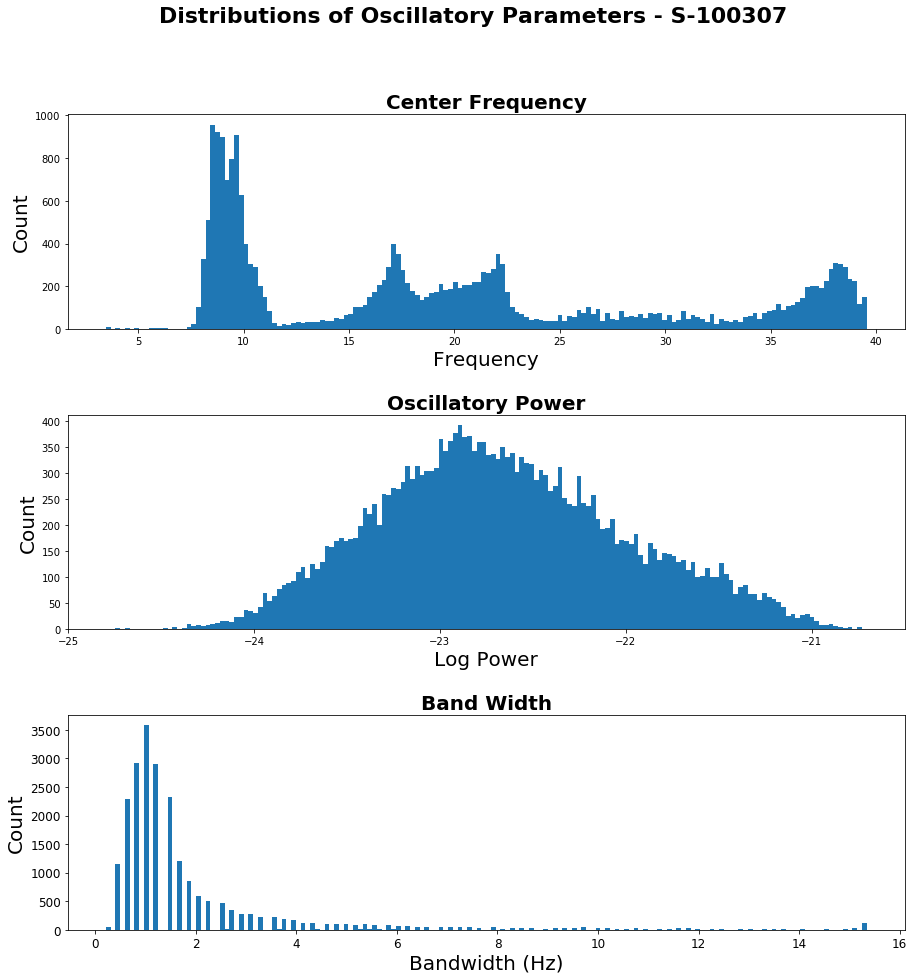

In [10]:
# Plot the distributions of centers, powers and bandwidths, across all oscillations
plot_all_oscs(meg_subj.centers_all, meg_subj.powers_all, meg_subj.bws_all, meg_subj.comment)

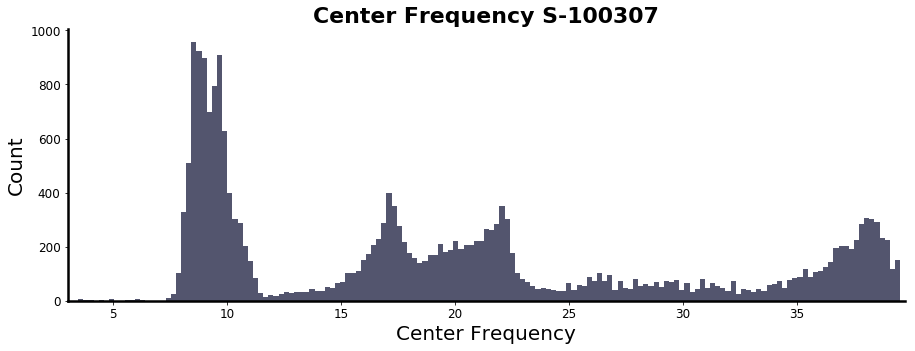

In [11]:
# Plot a single oscillation parameter at a time
plot_all_oscs_single(meg_subj.centers_all, 0, meg_subj.comment)

In [12]:
# Calculate correlations between oscillatory parameters
rs_mat, ps_mat, labels = meg_subj.calc_osc_param_corrs()
print_corrs_mat(rs_mat, ps_mat, labels)

Corr of  Centers-Powers      is  -0.6925     with p-val of  0.00000
Corr of  Centers-Bandwidths  is  +0.2056     with p-val of  0.00000
Corr of  Powers-Bandwidths   is  -0.2463     with p-val of  0.00000


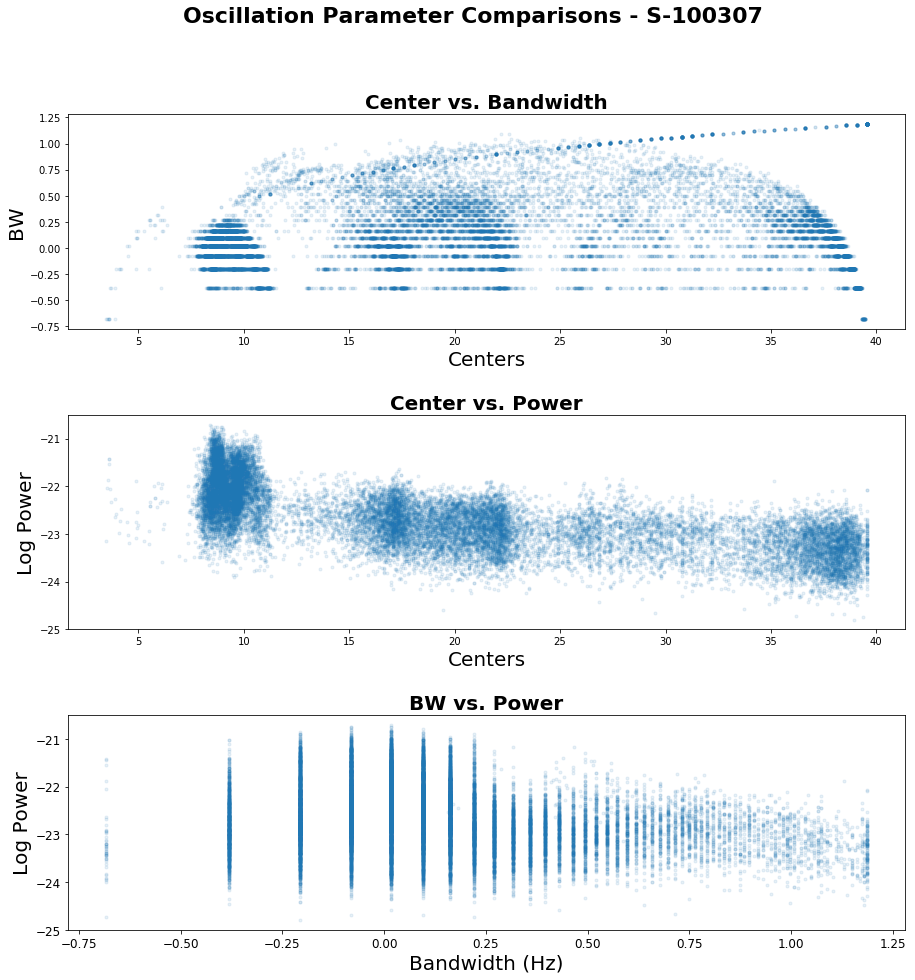

In [13]:
# Plot the comparisons between oscillatory parameters
plot_osc_param_comparison(meg_subj.centers_all, meg_subj.powers_all, meg_subj.bws_all, meg_subj.comment)